# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-test-splitting" data-toc-modified-id="Train-test-splitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test splitting</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Intro

A decision tree tries to predict the target variable using a logic like the following.

<img src="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width=600>

Decision trees:
 * are used **both** for classification (previous example Fit/Unfit) and regression
 * involve stratifying (segmenting) the predictor space...
 * in an iterative manner
 * are given this name because splitting rules can be summarized in a tree

Decision trees:
 * are simple
 * are useful for interpretation
 * are not very powerful predictors but...
 * give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms

## The problem

Today we will be using a **white wine** dataset

Experts have rated several wines, whose physical properties are also given

In [2]:
df = pd.read_csv("../datasets/wine_quality.csv")

In [3]:
df.shape

(4898, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3740,7.0,0.150,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7
647,7.4,0.105,0.34,12.2,0.050,57.0,146.0,0.99730,3.16,0.37,9.0,6
3830,4.8,0.260,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.5,7
4726,6.3,0.480,0.48,1.8,0.035,35.0,96.0,0.99121,3.49,0.74,12.2,6
2731,7.9,0.510,0.36,6.2,0.051,30.0,173.0,0.99840,3.09,0.53,9.7,5
685,6.2,0.360,0.26,13.2,0.051,54.0,201.0,0.99760,3.25,0.46,9.0,5
4821,7.0,0.240,0.47,1.3,0.043,18.0,131.0,0.99176,3.19,0.45,11.0,6
1850,7.1,0.250,0.25,1.6,0.046,50.0,181.0,0.99250,3.20,0.42,11.0,7
1470,7.6,0.520,0.49,14.0,0.034,37.0,156.0,0.99580,3.14,0.38,11.8,7
3698,6.3,0.220,0.34,1.2,0.036,32.0,96.0,0.98961,3.06,0.74,11.6,6


In [6]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

We want to:
 * build a **supervised** learning model
 * which is a **regression** model (predict quantitative feature)
 * that tries to predict wine `quality` from its physical properties (so that we do not anymore need experts' advice)

We will do train test splitting for correct asessment of model performance

We will use MSE metric: $$MSE=\frac{1}{N}\sum(\hat{y} - y)^2$$

In [7]:
from sklearn.metrics import mean_squared_error

We will:
 * try several models and...
 * keep the one with the **least** MSE on **test set** (also called test error)
 * anyways, we will always show training error too

## Data exploration

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [12]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

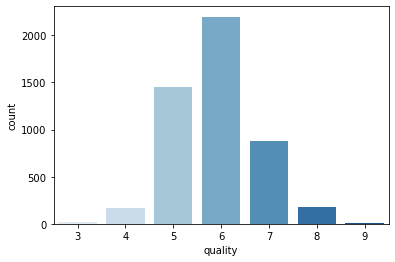

In [13]:
#We explore the starting data set
sns.countplot(x=df.quality, palette="Blues")

<AxesSubplot:xlabel='fixed_acidity', ylabel='Count'>

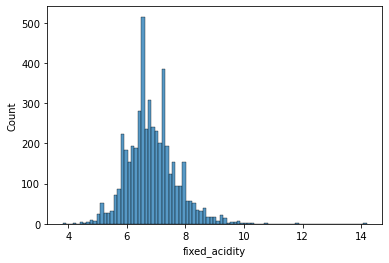

In [14]:
sns.histplot(df.fixed_acidity)

## Train test splitting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
target = "quality"

In [35]:
# predictors
X = df.drop(target, axis=1)
# target
y = df[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [37]:
X.shape

(4898, 11)

In [38]:
X_train.shape

(3918, 11)

In [39]:
X_test.shape

(980, 11)

In [40]:
y_train.shape

(3918,)

In [41]:
y_test.shape

(980,)

## Models

### Baseline model

The baseline model predicts the mean quality for every wine

<AxesSubplot:xlabel='quality', ylabel='count'>

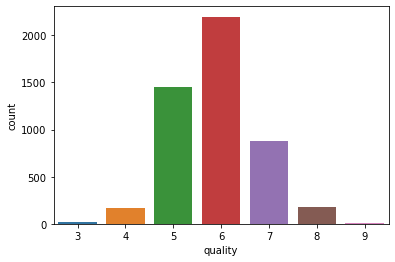

In [42]:
sns.countplot(x=df.quality)

In [44]:
baseline = y_train.mean()

In [45]:
baseline

5.870597243491577

MSE can be manually computed

Train error

In [46]:
((y_train - baseline) ** 2).mean()

0.7854499240557395

Test error

In [47]:
((y_test - baseline) ** 2).mean()

0.7794478267751117

### Simple tree (depth=1)

Lets first fit a Tree, then interpret it

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
model = DecisionTreeRegressor(max_depth=1)

In [57]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

Lets see how this model predicts the first 5 wines

In [58]:
# real values
y_train[:5]

3662    4
4187    6
2299    7
2951    5
3393    6
Name: quality, dtype: int64

In [59]:
# predicted values
model.predict(X_train[:5].values).round(2)

array([5.6 , 6.33, 6.33, 5.6 , 6.33])

Train error

In [60]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

0.6597595112633031

Test error

In [61]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

0.6509215973494402

In [62]:
from sklearn.tree import plot_tree

In [63]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


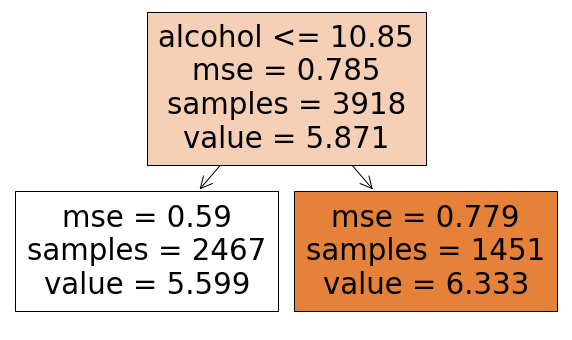

In [64]:
fig = plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [65]:
X_train[:5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3662,6.1,0.60,0.12,1.8,0.050,11.0,76.0,0.99268,3.42,0.48,10.4
4187,5.9,0.24,0.34,2.0,0.037,40.0,108.0,0.98948,3.19,0.50,12.3
2299,7.0,0.32,0.31,6.4,0.031,38.0,115.0,0.99235,3.38,0.58,12.2
2951,7.2,0.20,0.22,1.6,0.044,17.0,101.0,0.99471,3.37,0.53,10.0
3393,8.0,0.28,0.30,8.4,0.030,35.0,115.0,0.99192,2.93,0.42,12.3


In [66]:
model.predict(X_train[:5].values).round(2)

array([5.6 , 6.33, 6.33, 5.6 , 6.33])

Some important questions for deep understanding:
 1. while training, why did the DecisionTree choose `alcohol` and $10.85$ ?

Imagine we chose `residual_sugar` and value 5

In [67]:
group1 = X_train[X_train.residual_sugar <= 5].copy()
group2 = X_train[X_train.residual_sugar > 5].copy()

In [68]:
group1.shape

(1923, 11)

In [69]:
group2.shape

(1995, 11)

In [70]:
group1_mean = y_train[group1.index].mean()

In [71]:
group2_mean = y_train[group2.index].mean()

In [72]:
group1_mean

5.972958918356734

In [73]:
group2_mean

5.771929824561403

In [74]:
mse = (
    ((y_train[group1.index] - group1_mean) ** 2).sum() +
    ((y_train[group2.index] - group2_mean) ** 2).sum()
) / X_train.shape[0]

In [75]:
mse

0.7753501617993845

Shitty improvement over baseline model, and much worse than alcohol 10.85, optimal feature-threshold pair

2. what is the meaning of `mse`: the mean squared error in the bucket: the one you would get if every wine in that bucket was given the mean of the bucket. This is, a baseline model in the bucket.
3. what is the meaning of `value`: the mean quality of wines in that bucket. The value that will be predicted for every new wine ending in that tree leaf

4. while testing (predicting a new instance), how does the tree operate? It goes through a unique path. When this path ends, the value in that leaf is the prediction

### Bigger tree (depth=3)

In [ ]:
model = DecisionTreeRegressor(max_depth=3)

In [ ]:
%%time
model.fit(X_train, y_train)

In [ ]:
# real values
y_train[:5]

In [ ]:
# predicted values
model.predict(X_train[:5].values).round(2)

Train error

In [ ]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

Test error

In [ ]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Huge tree (depth=20)

In [ ]:
model = DecisionTreeRegressor(max_depth=20)

In [ ]:
model.fit(X_train, y_train)

Train error

In [ ]:
mean_squared_error(
    y_true=y_train,
    y_pred=model.predict(X_train)
)

Test error

In [ ]:
mean_squared_error(
    y_true=y_test,
    y_pred=model.predict(X_test)
)

**WHAT HAPPENED??**

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

### Overfitting

Lets see how training and test error changes with `max_depth`

In [ ]:
results = []

for depth in range(1, 20):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

We can see how, when `max_depth` increases above ~6:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)

This is the famous overfitting! And this is why **test error** is the one you should look at!

### Other hyperparameters

As well as `max_depth`, there are other **hyperparameters** that let us build different trees' architectures of the family DecisionTreeRegressor:
 * `min_samples_split`: the minimum number of samples required to split an internal node  
 * `max_features`: the number of features to consider when looking for the best split  

In [ ]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=100, max_features=8)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

### Grid search

Lets find the **best** combination of hyperparameters, i.e. the ones yielding the least test error, among a prescribed grid of values for each hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100, 300, 1000],
        "max_features": [7, 11]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [ ]:
%%time
gs.fit(X_train, y_train)

Lets sort all trees by their performance:

In [ ]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [ ]:
grid_search_results.sort_values("mean_test_score", ascending=False).head()

We can access the best estimator of the grid search in this way

In [ ]:
best_tree = gs.best_estimator_

In [ ]:
best_tree

In [ ]:
mean_squared_error(best_tree.predict(X_test), y_test)

## Feature importance

How important were features for predicting `quality`? DecisionTreeRegressor has an attribute `feature_importances_`

In [ ]:
feature_imp = pd.Series(best_tree.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)

In [ ]:
sns.barplot(x=feature_imp.values, y=feature_imp.index)

In [ ]:
fig = plt.figure(figsize=(20, 20))
plot_tree(best_tree, feature_names=df.columns[:-1], filled=True);

Save in format `.svg` for non-pixeled image!!

In [ ]:
fig.savefig("decision_tree.svg", facecolor="white")

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`) and classification (`DecisionTreeClassifier`)
 * Their behavior is quite intuitive
 * Their behavior is interpretable and explainable

 * Decision trees overfit when `max_depth` becomes very big (obvious, individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error

 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms